### Lath Essoh

### 4. Classification

In [5]:
import sys
sys.path.append("..") 
  
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split

/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


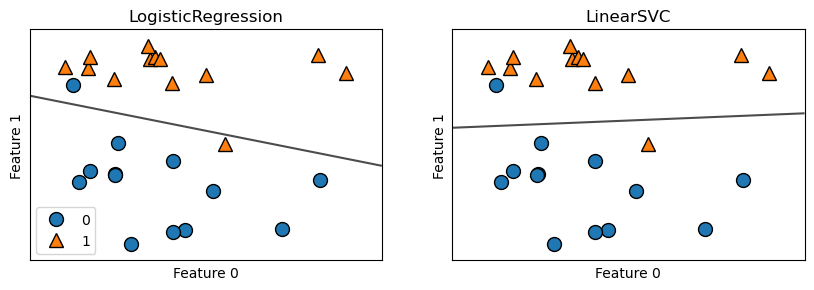

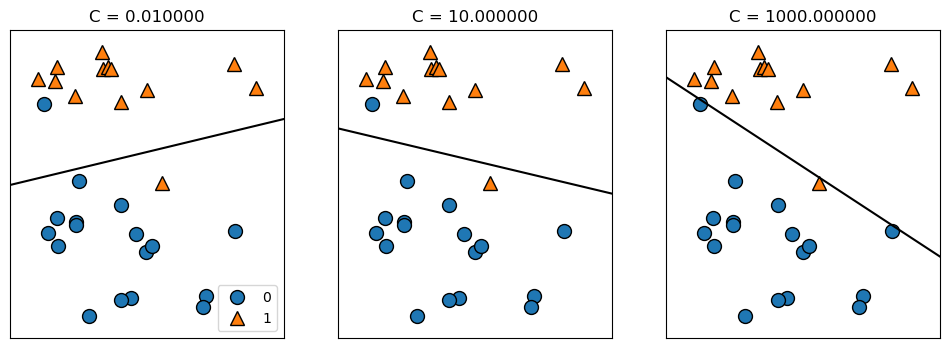

In [7]:
# *************************** Understanding decision boundaries ********************************
# **********************************************************************************************

#--- Case 1: Two classes problem ---

# Import the dataset
X, y = mglearn.datasets.make_forge()

# Plot decision boundaries for two methods: (i) logistic regressions and (ii) support vector classifier
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LogisticRegression(), LinearSVC()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

# The decision boundary changes according to different values of the cost parameter
# e.g. a small C correspends to a lot of regularization
mglearn.plots.plot_linear_svc_regularization()

/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


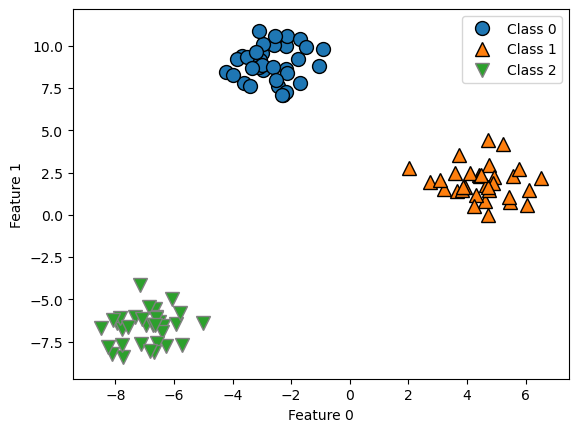

In [9]:
#--- Case 2: Multiclass program ---

# Import the dataset
from sklearn.datasets import make_blobs

# Plot the data 
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

# Fit the model
linear_svm = LinearSVC().fit(X, y)

In [ ]:
# Some notes:
# One vs. Rest approach: a binary model is learned for each class that separates that class from all the other classes
# To make predictions (and also draw decision boundaries), all binary classifiers are run on a test observation 
# and the classifier with the highest score on its single class determines the final class label

Text(0, 0.5, 'Feature 1')

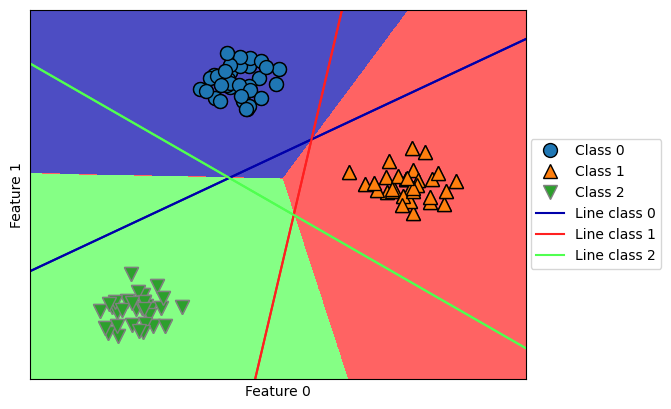

In [11]:
# Plot the different decision boundaries
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

# Color the regions
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# QUESTION: What happens if you change the random_state when generating the data?

/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


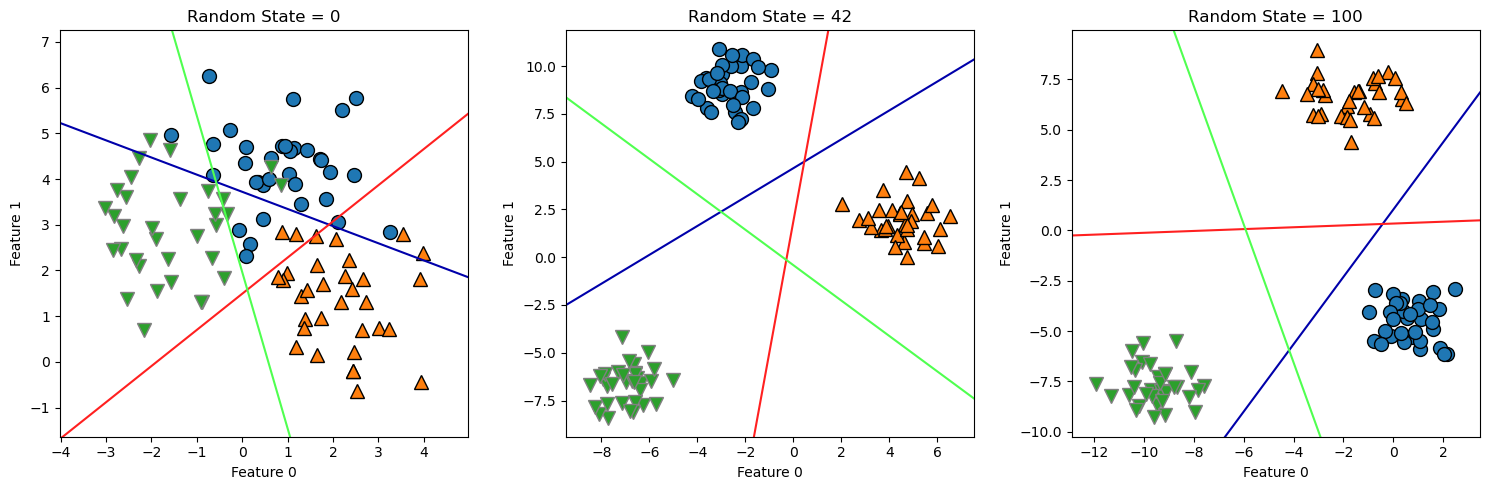

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
import mglearn

# Define different random states
random_states = [0, 42, 100]

# Create subplots
fig, axes = plt.subplots(1, len(random_states), figsize=(15, 5))

for i, state in enumerate(random_states):
    # Generate dataset with different random_state
    X, y = make_blobs(random_state=state)
    
    # Fit the model
    linear_svm = LinearSVC().fit(X, y)
    
    # Plot the data points
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[i])
    
    # Plot decision boundaries
    line = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1)
    for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
        axes[i].plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
    # Format plot
    axes[i].set_title(f'Random State = {state}')
    axes[i].set_xlabel('Feature 0')
    axes[i].set_ylabel('Feature 1')
    axes[i].set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    axes[i].set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

plt.tight_layout()
plt.show()

Lorsqu'on change random_state, les points de données ont une répartition différente, Le modèle s'entraîne et teste sur des ensembles différents, ce qui peut influencer les frontières de décision et les résultats
Maintenir un random_state fixe assure la reproductibilité, tandis que le changer ou l'omettre introduit de la variance dans les résultats à chaque exécution

In [14]:
# ****************************** Logistic regression **********************************
# *************************************************************************************

### The objective is to develop a classifier to predict the type of a breast cancer (Malignant=1; Benign=0)
### based on a set of features obtained through digitized fine-needle aspirate (FNA) images of a breast mass 

# Import breast cancer data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# # Create training and test set
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

# Fit the model on the training set 
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

# QUESTION: Why is it preferable to set a maximum number of iterations?

Il est préférable de fixer une limite pour le nombre d'itérations afin d'assurer que l'algorithme ait le temps de converger, tout en évitant des calculs inutiles ou excessivement longs. Ici, la valeur max_iter=5000 est choisie pour garantir que le modèle ait suffisamment d'itérations pour atteindre la convergence

In [20]:
# Check the performance of the model
print("Accuracy (training): {:.3f}".format(logreg.score(X_train, y_train)))
print("Accuracy (test): {:.3f}".format(logreg.score(X_test, y_test)))

Accuracy (training): 0.967
Accuracy (test): 0.937


# QUESTION: How do you interpret the accuracy of the model?

96.7 % de précision sur l'ensemble d'entraînement signifie que le modèle a correctement classé 96.7 % des observations dans les données d'entraînement
93.7 % de précision sur l'ensemble de test indique que le modèle a correctement prédit 93.7 % des cas sur les données qu'il n'a jamais vues (les données de test)
L'accuracy de 93.7 % sur l'ensemble de test indique que le modèle est performant et qu'il généralise bien aux nouvelles données

In [18]:
# Regularization: change the value of C to change the flexibility of the model
logreg001 = LogisticRegression(max_iter=5000, C=0.001).fit(X_train, y_train)
logreg50 = LogisticRegression(max_iter=5000, C=50).fit(X_train, y_train)

# Check the performance of the models
print("Accuracy C=0.001 (test): {:.3f}".format(logreg001.score(X_test, y_test)))
print("Accuracy C=50 (test): {:.3f}".format(logreg50.score(X_test, y_test)))

Accuracy C=0.001 (test): 0.930
Accuracy C=50 (test): 0.944


# QUESTION: How can you find the optimal value of C ? Propose a solution ?

Pour trouver la valeur optimale de C dans un modèle de régression logistique, on peut utiliser la technique appelée validation croisée

Solution proposée : 

In [49]:
from sklearn.model_selection import GridSearchCV

# Définir les valeurs de C à tester
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 50, 100]}

# Créer un modèle de régression logistique
logreg = LogisticRegression(max_iter=5000)

# Appliquer la recherche de grille avec validation croisée (5-fold par défaut)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Entraîner le modèle avec différentes valeurs de C sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher la meilleure valeur de C et les meilleures performances
print("Meilleure valeur de C : ", grid_search.best_params_)
print("Meilleure précision sur l'ensemble de validation : {:.3f}".format(grid_search.best_score_))

# Tester les performances du modèle optimisé sur l'ensemble de test
print("Précision sur l'ensemble de test avec la meilleure valeur de C : {:.3f}".format(grid_search.score(X_test, y_test)))

/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Meilleure valeur de C :  {'C': 100}
Meilleure précision sur l'ensemble de validation : 0.965
Précision sur l'ensemble de test avec la meilleure valeur de C : 0.965


/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/var/folders/zb/g_1hb0z95cz6n35gdj_kc1sm0000gn/T/ipykernel_19709/1973110244.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
/var/folders/zb/g_1hb0z95cz6n35gdj_kc1sm0000gn/T/ipykernel_19709/1973110244.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')


Text(0.5, 0, 'feature1 ** 2')

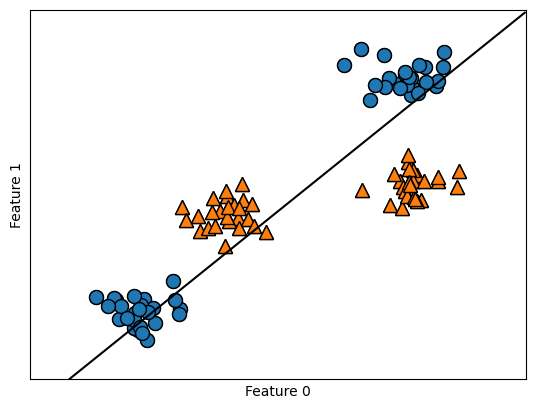

<Figure size 640x480 with 0 Axes>

In [27]:
# ****************************** SVM - Understanding Kernel trick *********************
# *************************************************************************************

# Import data 
X, y = make_blobs(centers=4, random_state=8)

# Convert the values of y to binary (0 or 1) based on whether the original values are even or odd
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Classes are not linearly separable, yet we can still use SVC
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Add a quadratic term of first feature
# (note that X_new is a three-dimensional point)
X_new = np.hstack([X, X[:, 1:] ** 2])

# Plot the new input space
from mpl_toolkits.mplot3d import Axes3D
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2") 

# QUESTION: Can observations be linearly separated in this new input space?

Oui, les observations peuvent être linéairement séparées dans ce nouvel espace après avoir ajouté le terme quadratique. C'est un exemple de l'effet du "truc du noyau" (kernel trick) utilisé dans les machines à vecteurs de support (SVM) : en projetant les données dans un espace de dimension supérieure, il devient possible de les séparer linéairement, même si elles ne sont pas séparables dans l'espace d'origine

Cela montre la puissance des SVM avec un noyau non linéaire pour résoudre des problèmes de classification complexes

/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/var/folders/zb/g_1hb0z95cz6n35gdj_kc1sm0000gn/T/ipykernel_19709/3552527402.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
/var/folders/zb/g_1hb0z95cz6n35gdj_kc1sm0000gn/T/ipykernel_19709/3552527402.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')


Text(0, 0.5, 'Feature 1')

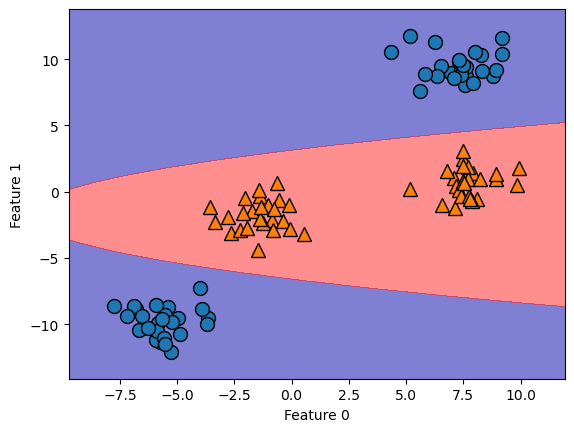

In [29]:
# Fit the model on the new features
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# Separate the two classes in the new input space
figure = plt.figure()
ax = Axes3D(figure, elev=-155, azim=-20)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.6)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

# Notice that in the original input space, the decision boundary is not linear anymore
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [31]:
# ****************************** SVM - Playing with hyper-parameters *********************
# ****************************************************************************************

# Import the data
X, y = mglearn.tools.make_handcrafted_dataset()    

# Fit the model with Gaussian kernel
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

# We can see which are the support vectors
sv = svm.support_vectors_

# Class labels of support vectors are given by the sign of the dual coefficients
svm.dual_coef_

array([[-10.        ,  -6.25178295,  -3.73381586,  10.        ,
          9.98559881]])

# QUESTION: How many support vectors do you have here?

La matrice svm.dual_coef_ nous donne les coefficients des vecteurs de support, qui sont les poids attribués aux vecteurs de support dans la fonction de décision du modèle SVM
Les valeurs non nulles dans de cette matrice (tableau) indiquent les vecteurs de support qui influencent la frontière de décision
On a donc ici, 5 vecteurs de support qui sont utilisés pour le modèle SVM avec noyau gaussien (RBF)

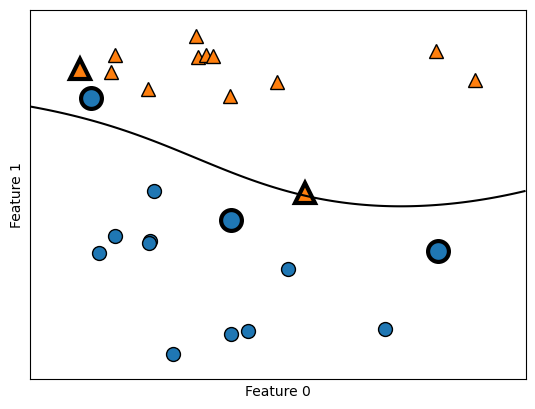

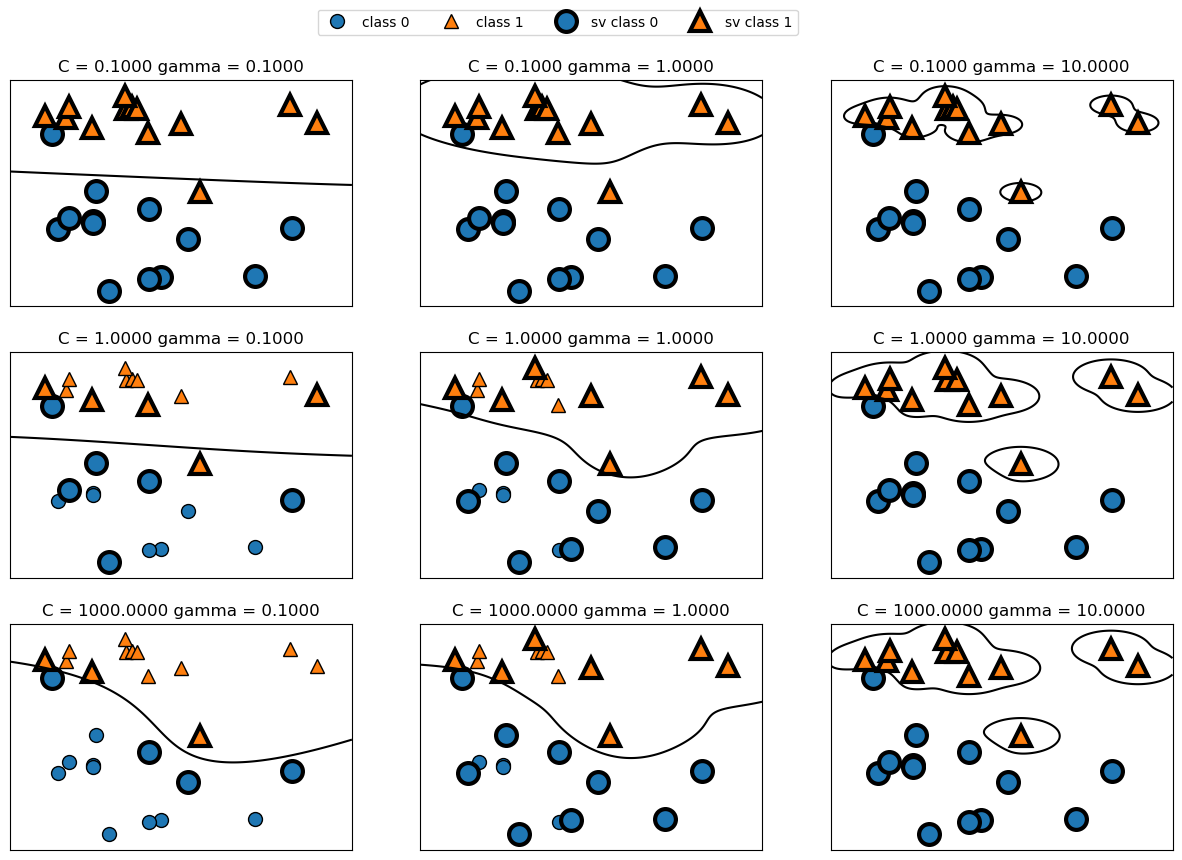

In [34]:
# Plot the decision boundary and support vectors
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Gamma controls the width of the kernel, while C is the usual cost parameter
# Both can be changed to play with the flexibility of the model [this takes some time to run]
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2))

# QUESTION: Which model is likely to overfit the data? Which model has the highest bias?

- Modèle à overfitting : C élevé, gamma élevé (Le modèle 9)
- Modèle à biais élevé : C faible, gamma faible (Le modèle 1)

Accuracy (training): 0.904
Accuracy (test): 0.937
Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Accuracy (training): 0.984
Accuracy (test): 0.972


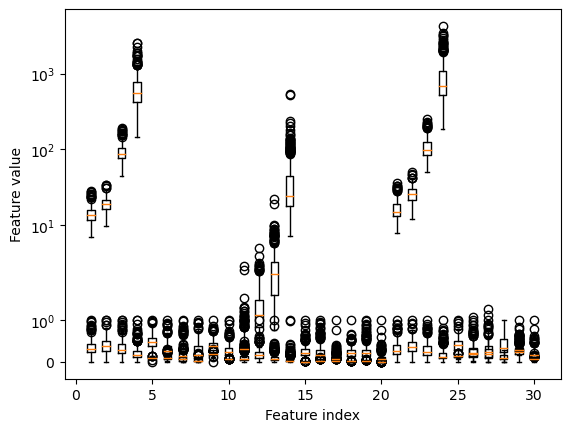

In [37]:
# ****************************** SVM - Summing up *********************
# *********************************************************************

# Import the data
cancer = load_breast_cancer()

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# Instantiate the model
# By default, C=1 and gamma=1/nb.features
svm = SVC()

# Fit the model on the training set 
svm.fit(X_train, y_train)

print("Accuracy (training): {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy (test): {:.3f}".format(svm.score(X_test, y_test)))

# IMPORTANT: SVM are sensitive to the scaling of the data
# Here data are on completely different orders of magnitude
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature value")

# One way to solve the problem is by rescaling each feature (there are different ways to do so)
# See also the functions:
#   - MinMaxScaler() - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
#   - StandardScaler() - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# We compute the minimum value for each feature on the training set
min_on_training = X_train.min(axis=0)
# And the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# Then we subtract the min and divide by range
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

# Now we obtain the same scale
plt.boxplot(X_train_scaled, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature value")

# Make sure to use the same scaling on the test set, using min and range of the training set
X_test_scaled = (X_test - min_on_training) / range_on_training

# Finally, check the performance of the model
svm = SVC()
svm.fit(X_train_scaled, y_train)

print("Accuracy (training): {:.3f}".format(svm.score(X_train_scaled, y_train)))
print("Accuracy (test): {:.3f}".format(svm.score(X_test_scaled, y_test)))

# QUESTIONS:
# What happens to the performance of the model if you use the StandardScaler()?

Accuracy (training): 0.986
Accuracy (test): 0.965


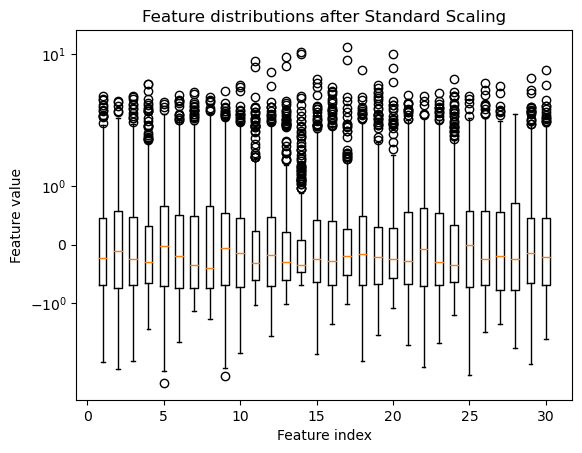

In [64]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import the data
cancer = load_breast_cancer()

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the model
svm = SVC()

# Fit the model on the scaled training set
svm.fit(X_train_scaled, y_train)

# Check the performance of the model
print("Accuracy (training): {:.3f}".format(svm.score(X_train_scaled, y_train)))
print("Accuracy (test): {:.3f}".format(svm.score(X_test_scaled, y_test)))

# Visualize the scaled feature distributions
plt.boxplot(X_train_scaled, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature value")
plt.title("Feature distributions after Standard Scaling")
plt.show()

L'utilisation de StandardScaler() a amélioré la précision :

- Before Scaling : Précision d'entraînement : 0.984, Précision de test : 0.972
- After Scaling : Précision d'entraînement : 0.986, Précision de test : 0.965

La précision du modèle s'est améliorée après avoir utilisé StandardScaler(), ce qui indique que la normalisation des caractéristiques aide le modèle SVM à mieux performer en équilibrant l'importance de chaque caractéristique

# How can you find the optimal value of C and gamma? Propose a solution

Pour trouver les valeurs optimales de C et de gamma, on peut utiliser la technique Grid Search with Cross-Validation 

In [69]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV

# Load data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # Example values for C
    'gamma': [0.001, 0.01, 0.1, 1, 10]  # Example values for gamma
}

# Instantiate the model
svm = SVC()

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set with the best parameters
best_svm = grid_search.best_estimator_
print("Test set accuracy with best parameters:", best_svm.score(X_test, y_test))

Best parameters found: {'C': 1, 'gamma': 0.001}
Best cross-validation score: 0.9223803009575923
Test set accuracy with best parameters: 0.9300699300699301


On peut aussi utiliser la technique Random Search with Cross-Validation : 

In [72]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform

# Load data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# Define the parameter distribution
param_distributions = {
    'C': uniform(0.1, 1000),  # Uniform distribution from 0.1 to 1000
    'gamma': uniform(0.001, 10)  # Uniform distribution from 0.001 to 10
}

# Instantiate the model
svm = SVC()

# Setup the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_distributions, n_iter=100, cv=5, scoring='accuracy', random_state=0)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Evaluate on test set with the best parameters
best_svm = random_search.best_estimator_
print("Test set accuracy with best parameters:", best_svm.score(X_test, y_test))

Best parameters found: {'C': 548.9135039273248, 'gamma': 7.152893663724195}
Best cross-validation score: 0.6267578659370725
Test set accuracy with best parameters: 0.6293706293706294


# Propose at least another Kernel function and test the performance of the model 

Polynomial Kernel Function :

In [58]:
# Instantiate and fit the SVM model with a polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1).fit(X_train_scaled, y_train)

# Check the performance on the training and test sets
print("Accuracy (training - polynomial kernel): {:.3f}".format(svm_poly.score(X_train_scaled, y_train)))
print("Accuracy (test - polynomial kernel): {:.3f}".format(svm_poly.score(X_test_scaled, y_test)))

Accuracy (training - polynomial kernel): 0.988
Accuracy (test - polynomial kernel): 0.958


Précision d'entraînement (0.988) : La précision d'entraînement étant très élevée, il est suggéré que le noyau polynomial s'adapte très bien aux données d'entraînement. Cela indique que le modèle a appris efficacement les motifs présents dans le jeu de données d'entraînement

Précision de test (0.958) : La précision de test est également élevée, bien qu'un peu inférieure à celle de l'entraînement. Cela est généralement interprété comme un bon signe, montrant que le modèle se généralise bien aux nouvelles données. La petite baisse de précision entre l'entraînement et le test indique que le modèle n'est pas excessivement en surapprentissage

Il semble que le noyau polynomial avec un degré de 3 fonctionne bien pour les données, offrant une haute précision tant sur les ensembles d'entraînement que de test. La légère diminution de la performance sur l'ensemble de test par rapport à l'entraînement est normale et montre que le modèle se généralise bien sans surapprentissage significatif. Si des améliorations supplémentaires sont nécessaires, il pourrait être utile d'expérimenter avec différents degrés pour le noyau polynomial ou d'autres hyperparamètres

Sigmoid Kernel Function : 

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# Define the parameter grid for Sigmoid Kernel
param_grid_sigmoid = {
    'C': [0.1, 1, 10, 100, 1000],  # Example values for C
    'gamma': [0.001, 0.01, 0.1, 1],  # Example values for gamma
    'coef0': [0, 1, 10]  # Coefficient term
}

# Instantiate the model with Sigmoid Kernel
svm_sigmoid = SVC(kernel='sigmoid')

# Setup the GridSearchCV
grid_search_sigmoid = GridSearchCV(estimator=svm_sigmoid, param_grid=param_grid_sigmoid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_sigmoid.fit(X_train_scaled, y_train)

# Print best parameters and best score
print("Best parameters for Sigmoid Kernel:", grid_search_sigmoid.best_params_)
print("Best cross-validation score for Sigmoid Kernel:", grid_search_sigmoid.best_score_)

# Evaluate on test set with the best parameters
best_svm_sigmoid = grid_search_sigmoid.best_estimator_
print("Test set accuracy with Sigmoid Kernel:", best_svm_sigmoid.score(X_test_scaled, y_test))